# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [140]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp_states = pd.read_csv("Temp_States.csv")

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Print `temp`

In [18]:
temp_states

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [8]:
# your answer here
temp_states.dtypes

#We have strings for city and states and floats for the temperature


City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [9]:
NY_state = temp_states[temp_states["State"] == "New York"]
NY_state

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
# your answer here

NY_state["Temperature"].mean()


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
# your answer here
t = temp_states[temp_states["Temperature"] > 15]
t

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [14]:
# your answer here
t_cities = t["City"]
t_cities

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [17]:
# your answer here
t_ = temp_states[(temp_states["Temperature"] > 15)&(temp_states["Temperature"] < 20)]
t_["City"]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [40]:
# your answer here
temp_states.groupby('State')['Temperature'].agg(['mean', 'std'])

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [29]:
# your answer here
employee = pd.read_csv("Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [22]:
# your answer here
employee.dtypes

''' We've got string and integers. The ints are Years and Salaries.'''

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<Axes: xlabel='Department', ylabel='Count'>

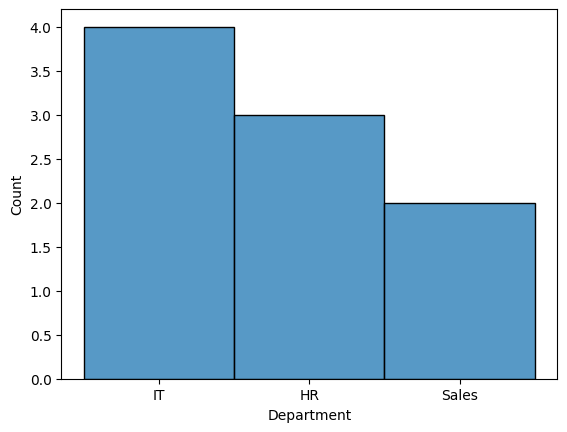

In [112]:
# your answer here
f = sns.histplot(employee, x = "Department",bins = 5)
f

<Axes: xlabel='Education', ylabel='Count'>

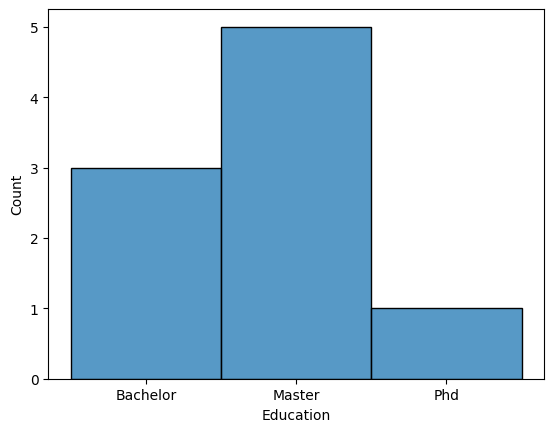

In [145]:
g = sns.histplot(employee, x = "Education", bins = 5)
g

<Axes: xlabel='Years', ylabel='Count'>

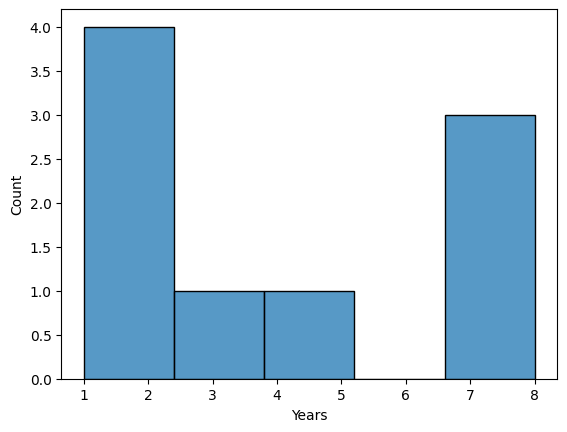

In [147]:
h = sns.histplot(employee, x = "Years", bins = 5)
h

<Axes: xlabel='Salary', ylabel='Count'>

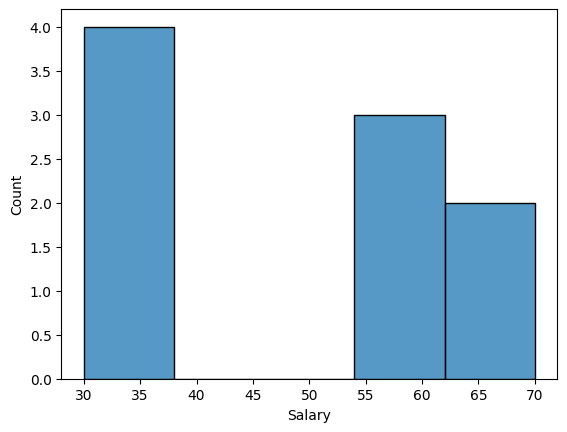

In [148]:
i = sns.histplot(employee, x = "Salary", bins = 5)
i

#### What's the average salary in this company?

In [37]:
# your answer here
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [38]:
# your answer here
employee["Salary"].max()

70

#### What's the lowest salary?

In [39]:
# your answer here
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [42]:
# your answer here
min_s = employee[employee["Salary"] == 30]
min_s["Name"]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [43]:
# your answer here
david = employee[employee["Name"] == "David"]
david


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [44]:
# your answer here
david["Salary"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [45]:
# your answer here
associate = employee[employee["Title"] == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [46]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [47]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [49]:
# your answer here
emp = employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]
emp

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [52]:
employee.groupby('Years')["Salary"].agg(['mean'])

,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [53]:
# your answer here
employee.groupby('Title')["Salary"].agg(['mean'])

,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<Axes: >

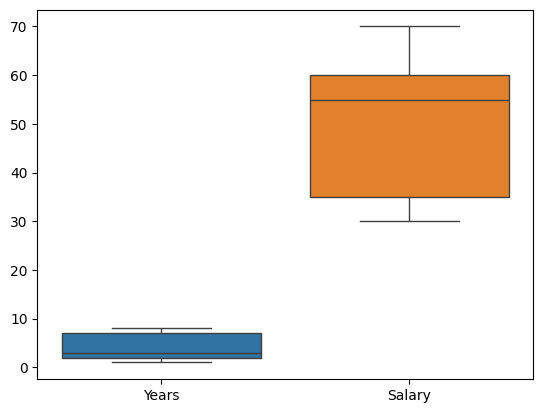

In [54]:
# draw boxplot here

sns.boxplot(employee)

In [27]:
# print first quartile here

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [55]:
# your answer here
employee.groupby('Gender')["Salary"].agg(['mean'])

,mean
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [58]:
# your answer here
employee.groupby("Department").aggregate({"Years":"max"})

,Years
Department,
HR,8
IT,8
Sales,3


In [60]:
employee.groupby("Department").aggregate({"Years":"min"})

,Years
Department,
HR,2
IT,1
Sales,2


In [62]:
employee.groupby("Department").aggregate({"Years":"mean"})

,Years
Department,
HR,4.666667
IT,4.500000
Sales,2.500000


In [63]:
employee.groupby("Department").aggregate({"Salary":"max"})

,Salary
Department,
HR,70
IT,70
Sales,55


In [64]:
employee.groupby("Department").aggregate({"Salary":"min"})

,Salary
Department,
HR,30
IT,30
Sales,55


In [65]:
employee.groupby("Department").aggregate({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [66]:
# your answer here
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [67]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [69]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
''' We can see for every quantitative column, the count, the mean, std, min, quartiles and max. We can also understand which methods works don't work for each column. 
For example, why would I want the mean of customer id? '''

####  What is the average Purchase Price?

In [70]:
# your answer here
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [79]:
# your answer here
orders["amount_spent"].max()

168469.6

In [77]:
# your answer here
orders["amount_spent"].min()

0.0

#### Select all the customers we have in Spain

In [81]:
# your answer here
spain = orders[orders["Country"]=="Spain"]
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [94]:
# your answer here
s = spain["CustomerID"].unique()
len(s)

30

#### Select all the customers who have bought more than 50 items ?

In [107]:
# your answer here
customer_totals = orders.groupby('CustomerID')['Quantity'].sum()
items = customer_totals[customer_totals> 50]
items

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18278       66
18281       54
18282      103
18283     1397
18287     1586
Name: Quantity, Length: 4091, dtype: int64

#### Select orders from Spain that are above 50 items

In [131]:
# your answer here
sp_items = orders[(orders["Country"]=="Spain")&(orders["Quantity"]>50)]
print(len(sp_items ))
sp_items.sample(5)

39


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
295956,407272,571851,23167,2011,10,3,13,small ceramic top storage jar,96,2011-10-19 13:02:00,0.69,12596,Spain,66.24
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
197169,282908,561669,23294,2011,7,4,17,set of 6 snack loaf baking cases,128,2011-07-28 17:09:00,0.72,12507,Spain,92.16
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
91156,136768,547972,22384,2011,3,1,16,lunch bag pink polkadot,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [121]:
# your answer here
free = orders[orders["UnitPrice"]== 0]
print(len(free))
free.head()

40


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [132]:
# your answer here

lunch = orders[orders["Description"].str.contains("lunch bag")]
lunch

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [134]:
# your answer here
lunch_year = orders[(orders["Description"].str.contains("lunch bag"))& (orders["year"]==2011)]
lunch_year

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

<Axes: xlabel='amount_spent', ylabel='Count'>

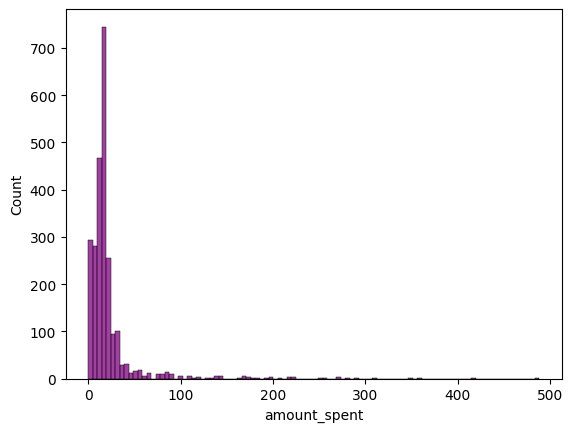

In [144]:
# your answer here
spain_ = orders[(orders["Country"]=="Spain")&(orders["amount_spent"]< 600)]
am_sp = spain_["amount_spent"]
sns.histplot(am_sp, color= "purple",bins = 100)

#### Select all orders made in the month of August

In [150]:
# your answer here
august = orders[orders["month"] == 8]
print(len(august))
august.sample(5)

27013


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
219485,309680,564137,82583,2011,8,2,11,hot baths metal sign,6,2011-08-23 11:30:00,2.10,15722,United Kingdom,12.60
221132,311712,564315,22400,2011,8,3,13,magnets pack of 4 home sweet home,1,2011-08-24 13:07:00,0.39,14730,United Kingdom,0.39
226123,320044,564959,22138,2011,8,3,14,baking set 9 piece retrospot,3,2011-08-31 14:22:00,4.95,17299,United Kingdom,14.85
212634,302355,563427,22557,2011,8,2,11,plasters in tin vintage paisley,5,2011-08-16 11:40:00,1.65,16470,United Kingdom,8.25
210662,299943,563183,22356,2011,8,5,14,charlotte bag pink polkadot,10,2011-08-12 14:47:00,0.85,14110,United Kingdom,8.50


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [156]:
# your answer here
august.groupby("Country").aggregate("Quantity").count()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: Quantity, dtype: int64

#### What's the  average amount of money spent by country

In [151]:
# your answer here
orders.groupby("Country").aggregate({"amount_spent":"mean"})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [159]:
# your answer here
orders.loc[orders["Description"].idxmax()]

Unnamed: 0                                167007
InvoiceNo                                 550965
StockCode                                  23137
year                                        2011
month                                          4
day                                            4
hour                                          16
Description     zinc wire sweetheart letter tray
Quantity                                       1
InvoiceDate                  2011-04-21 16:53:00
UnitPrice                                   3.75
CustomerID                                 16750
Country                           United Kingdom
amount_spent                                3.75
Name: 113624, dtype: object

#### What was the average amount spent per year ?

In [157]:
# your answer here
orders.groupby("year").aggregate({"amount_spent":"mean"})

,amount_spent
year,
2010,21.892733
2011,22.430074
